In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import seed


In [2]:
test = pd.read_csv('/home/kalyan/DataSets/SpaceShipTitainc_TFUGxKaggle/test.csv')
sample = pd.read_csv('/home/kalyan/DataSets/SpaceShipTitainc_TFUGxKaggle/sample_submission.csv')
train = pd.read_csv('/home/kalyan/DataSets/SpaceShipTitainc_TFUGxKaggle/train.csv')

In [3]:
## We will append Train And Test Data and process the null values in them both at the same time
train_test=train.append(test)

/tmp/ipykernel_139631/2130816990.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test=train.append(test)


PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64


<AxesSubplot: >

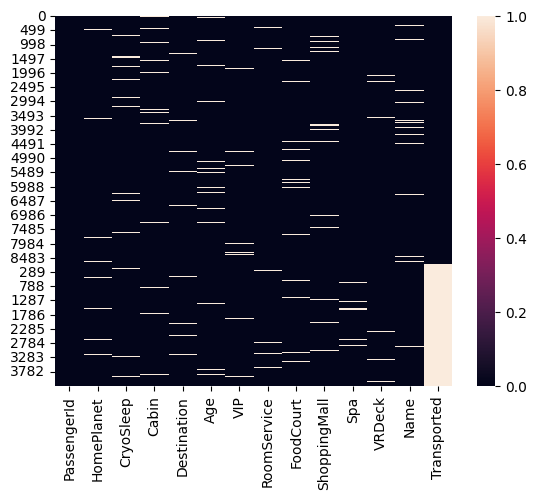

In [4]:
print(train_test.isnull().sum())
sns.heatmap(train_test.isnull())


### Expenses stuff

In [5]:
Expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [6]:
train_test.loc[:,Expenses_columns]=train_test.apply(lambda x: 0 if x.CryoSleep == True else x,axis =1)

In [7]:
train_test['Expenses'] = train_test.loc[:,Expenses_columns].sum(axis=1)
train_test.loc[:,['CryoSleep']]=train_test.apply(lambda x: True if x.Expenses == 0 and pd.isna(x.CryoSleep) else x,axis =1)

PassengerId        0
HomePlanet       288
CryoSleep        174
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      170
FoodCourt        180
ShoppingMall     175
Spa              177
VRDeck           177
Name             294
Transported     4277
Expenses           0
dtype: int64


<AxesSubplot: >

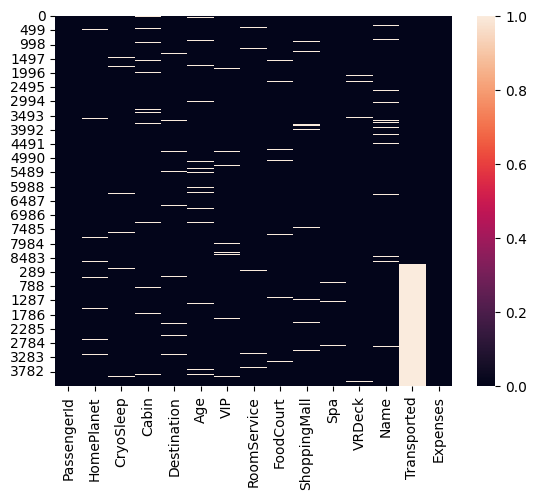

In [8]:
print(train_test.isnull().sum())
sns.heatmap(train_test.isnull())


In [9]:
# Just fill name so its not null

train_test.Name = train_test.Name.fillna('Name Name')


PassengerId        0
HomePlanet       288
CryoSleep        174
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      170
FoodCourt        180
ShoppingMall     175
Spa              177
VRDeck           177
Name               0
Transported     4277
Expenses           0
dtype: int64


<AxesSubplot: >

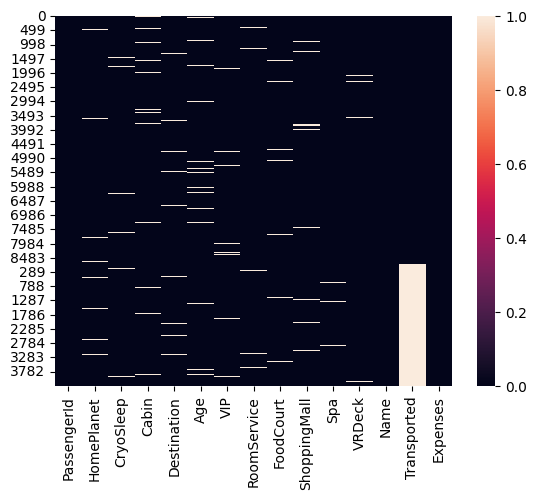

In [10]:
print(train_test.isnull().sum())
sns.heatmap(train_test.isnull())


In [11]:
# PassengerID contains room number so we can use it to fill the missing values in RoomNo
train_test.loc[:,['Room']] = train_test.PassengerId.apply(lambda x: x[0:4] )
#Here I want to create handbooks to fill in informations in Cabin, VIP status, HomePlanet and Destination.
guide_VIP=train_test.loc[:,['Room','VIP']].dropna().drop_duplicates('Room')
guide_Cabin=train_test.loc[:,['Room','Cabin']].dropna().drop_duplicates('Room')
guide_HomePlanet=train_test.loc[:,['Room','HomePlanet']].dropna().drop_duplicates('Room')
guide_Destination=train_test.loc[:,['Room','Destination']].dropna().drop_duplicates('Room')
train_test=pd.merge(train_test,guide_Cabin,how="left",on='Room',suffixes=('','_y'))
train_test=pd.merge(train_test,guide_VIP,how="left",on='Room',suffixes=('','_y'))
train_test=pd.merge(train_test,guide_HomePlanet,how="left",on='Room',suffixes=('','_y'))
train_test=pd.merge(train_test,guide_Destination,how="left",on='Room',suffixes=('','_y'))
train_test.loc[:,['VIP']]=train_test.apply(lambda x: x.VIP_y if pd.isna(x.VIP) else x,axis=1)
train_test.loc[:,['Cabin']]=train_test.apply(lambda x:  x.Cabin_y if pd.isna(x.Cabin) else x,axis=1)
train_test.loc[:,['HomePlanet']]=train_test.apply(lambda x:  x.HomePlanet_y if pd.isna(x.HomePlanet) else x,axis=1)
train_test.loc[:,['Destination']]=train_test.apply(lambda x:  x.Destination_y if pd.isna(x.Destination) else x,axis=1)

PassengerId         0
HomePlanet        157
CryoSleep         174
Cabin             162
Destination       154
Age               270
VIP               172
RoomService       170
FoodCourt         180
ShoppingMall      175
Spa               177
VRDeck            177
Name                0
Transported      4277
Expenses            0
Room                0
Cabin_y           162
VIP_y             172
HomePlanet_y      157
Destination_y     154
dtype: int64


<AxesSubplot: >

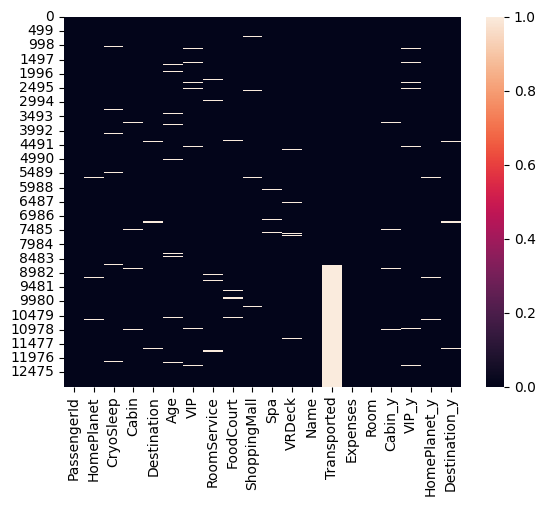

In [12]:
print(train_test.isnull().sum())
sns.heatmap(train_test.isnull())

# Age

/tmp/ipykernel_139631/3974135796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_test.corr(),annot=True)


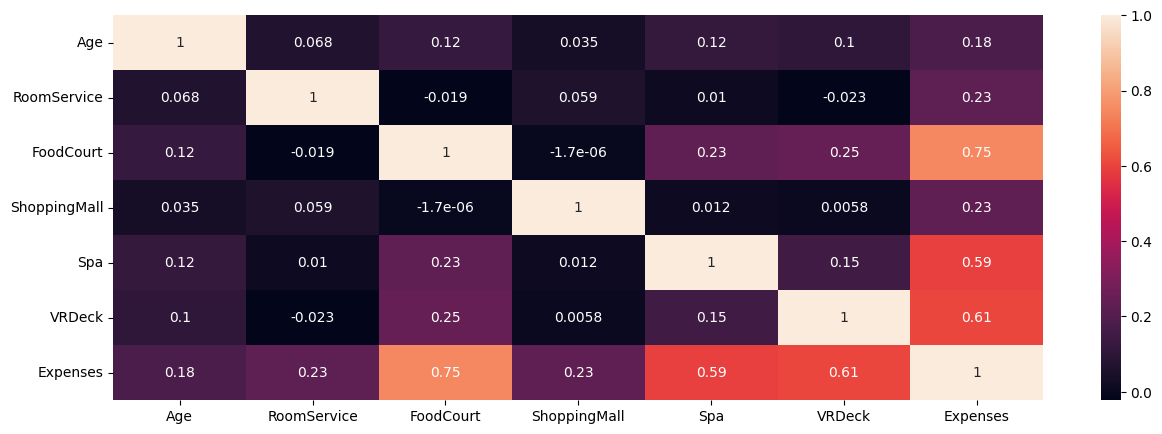

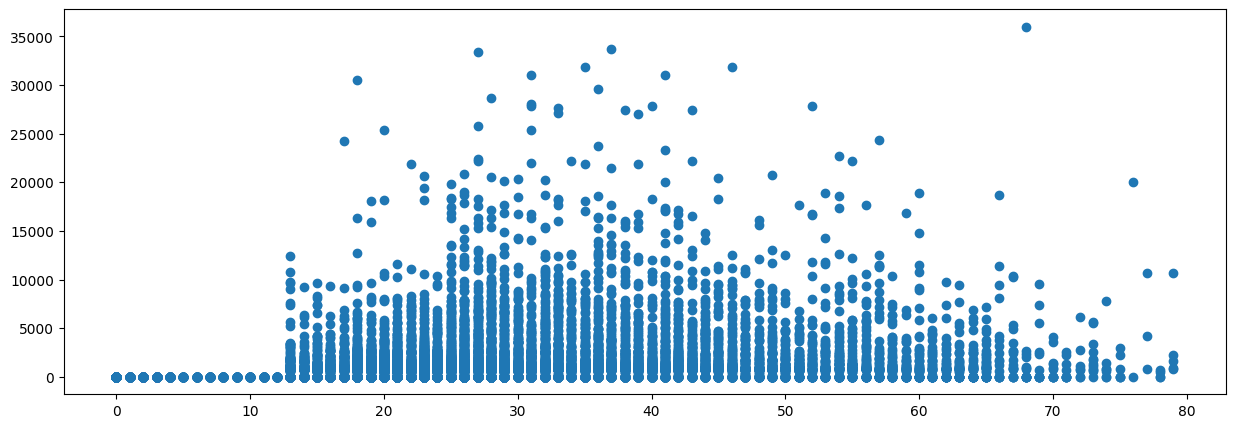

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(train_test.corr(),annot=True)

fig, ax = plt.subplots(figsize=(15,5))
analys = train_test.loc[:,['Age','Expenses']]
ax.scatter(analys.Age,analys.Expenses)

In [14]:
# From and To

analys = train_test.loc[:,['HomePlanet','Destination']]
analys['numeric'] =1
analys.groupby(['Destination','HomePlanet']).count()

numeric
Destination   HomePlanet         
55 Cancri e   Earth           995
              Europa         1343
              Mars            299
PSO J318.5-22 Earth          1083
              Europa           29
              Mars             68
TRAPPIST-1e   Earth          4737
              Europa         1780
              Mars           2328

In [15]:
train_test.loc[:,['Cabin_1']] = train_test.Cabin.str.split("/",expand=True).iloc[:,0]
train_test.loc[:,['Cabin_2']] = train_test.Cabin.str.split("/",expand=True).iloc[:,1]
train_test.loc[:,['Cabin_3']] = train_test.Cabin.str.split("/",expand=True).iloc[:,2]
train_test.loc[:,['FirstName']] = train_test.Name.str.split(" ",expand=True).iloc[:,0]
train_test.loc[:,['SecondName']] = train_test.Name.str.split(" ",expand=True).iloc[:,1]
train_test['Name_key']=train_test['SecondName']+train_test['Room']

PassengerId         0
HomePlanet        157
CryoSleep         174
Cabin             162
Destination       154
Age               270
VIP               172
RoomService       170
FoodCourt         180
ShoppingMall      175
Spa               177
VRDeck            177
Name                0
Transported      4277
Expenses            0
Room                0
Cabin_y           162
VIP_y             172
HomePlanet_y      157
Destination_y     154
Cabin_1           162
Cabin_2           162
Cabin_3           162
FirstName           0
SecondName          0
Name_key            0
dtype: int64


<AxesSubplot: >

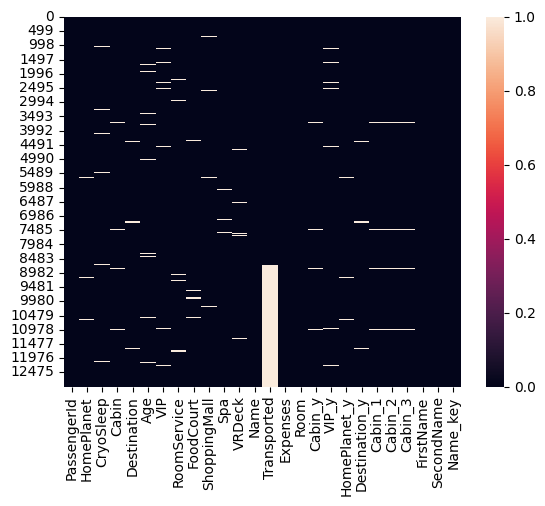

In [16]:
print(train_test.isnull().sum())
sns.heatmap(train_test.isnull())


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



num_cols = ['ShoppingMall', 'FoodCourt',
            'RoomService', 'Spa', 'VRDeck', 'Expenses', 'Age']
cat_cols = ['CryoSleep', 'Cabin_1', 'Cabin_3',
            'VIP', 'HomePlanet', 'Destination']
transported = ['Transported']
# notvg = ['HomePlanet','VIP','ShoppingMall','FoodCourt','Age','Cabin_2','Destination']
train_test = train_test[num_cols+cat_cols+transported].copy()

num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


train_test[num_cols] = pd.DataFrame(
    num_imp.fit_transform(train_test[num_cols]), columns=num_cols)
train_test[cat_cols] = pd.DataFrame(
    cat_imp.fit_transform(train_test[cat_cols]), columns=cat_cols)
temp_train = pd.DataFrame(ohe.fit_transform(
    train_test[cat_cols]), columns=ohe.get_feature_names_out())
train_test = train_test.drop(cat_cols, axis=1)
train_test = pd.concat([train_test, temp_train], axis=1)


In [18]:
train = train_test[train_test['Transported'].notnull()].copy()
train.Transported =train.Transported.astype('int')
test = train_test[train_test['Transported'].isnull()].drop("Transported",axis=1)

In [19]:
X = train.drop('Transported', axis=1)
y = train.Transported


In [20]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [21]:
from sklearn.model_selection import cross_val_score

def get_score(model, X, y):
    n = cross_val_score(model, X, y, scoring='accuracy', cv=10)
    return n


In [22]:
X

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,Expenses,Age,CryoSleep_False,CryoSleep_True,Cabin_1_A,...,Cabin_3_S,Cabin_3_None,VIP_False,VIP_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.0,0.0,0.0,0.000000,0.0,31.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,17.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,54.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,22.0,1752.0,4.0,304.607207,1778.0,26.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3.0,2.0,539.0,900.0,0.000000,1444.0,18.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,0.0,0.0,0.000000,0.0,19.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8689,0.0,0.0,0.0,0.0,0.000000,0.0,22.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8690,0.0,0.0,0.0,0.0,0.000000,0.0,38.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8691,1.0,2.0,0.0,0.0,881.000000,884.0,32.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
y

0       0
1       1
2       1
3       0
4       0
       ..
8688    1
8689    1
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [24]:
#creating model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=28, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

2022-12-18 14:12:53.442174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 14:12:53.579894: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-18 14:12:54.259069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-18 14:12:54.259134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [25]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________
None


2022-12-18 14:12:54.723804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 14:12:54.749303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 14:12:54.749544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 14:12:54.749985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [26]:
import numpy as np
training  = model.fit(X, y, epochs=25, batch_size=30, verbose=1)
print(np.mean(training.history['accuracy']))

Epoch 1/25
290/290 [==============================] - 2s 2ms/step - loss: 6.2740 - accuracy: 0.7468
Epoch 2/25
290/290 [==============================] - 1s 2ms/step - loss: 2.9102 - accuracy: 0.7659
Epoch 3/25
290/290 [==============================] - 1s 2ms/step - loss: 1.8091 - accuracy: 0.7658
Epoch 4/25
290/290 [==============================] - 1s 2ms/step - loss: 1.4725 - accuracy: 0.7595
Epoch 5/25
290/290 [==============================] - 1s 2ms/step - loss: 1.4132 - accuracy: 0.7672
Epoch 6/25
290/290 [==============================] - 1s 2ms/step - loss: 1.3821 - accuracy: 0.7674
Epoch 7/25
290/290 [==============================] - 1s 2ms/step - loss: 1.3378 - accuracy: 0.7637
Epoch 8/25
290/290 [==============================] - 1s 2ms/step - loss: 1.1015 - accuracy: 0.7673
Epoch 9/25
290/290 [==============================] - 1s 2ms/step - loss: 1.2056 - accuracy: 0.7722
Epoch 10/25
290/290 [==============================] - 1s 2ms/step - loss: 0.9692 - accuracy: 0.7671

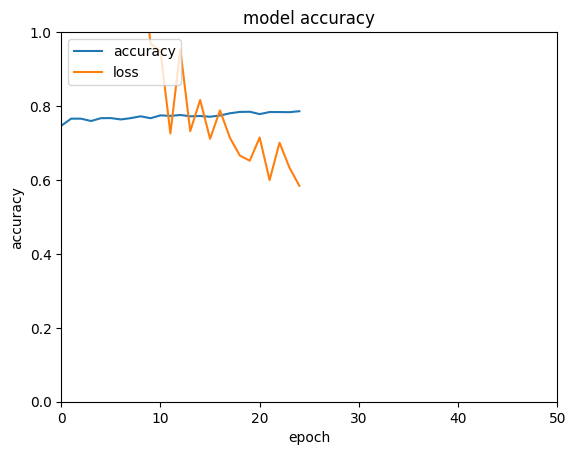

In [27]:
#plotting history
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.xlim(0, 50)
plt.ylim(0, 1)

plt.show()

In [28]:
#using lazy predict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X, X, y, y)
models


 28%|██▊       | 8/29 [00:04<00:11,  1.79it/s]


KeyboardInterrupt: 

0.9468537904060739
[[4029  286]
 [ 176 4202]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4315
           1       0.94      0.96      0.95      4378

    accuracy                           0.95      8693
   macro avg       0.95      0.95      0.95      8693
weighted avg       0.95      0.95      0.95      8693

0.9467592889126979


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/home/kalyan/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


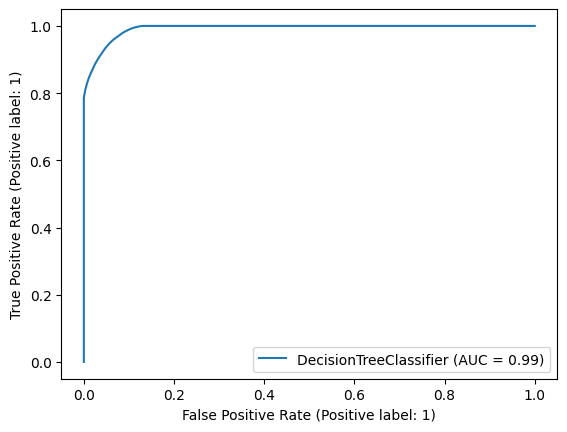

In [28]:
#using Decision Tree Classifier
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

dtc = DecisionTreeClassifier()
dtc.fit(X, y)
y_pred = dtc.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print(roc_auc_score(y, y_pred))
plot_roc_curve(dtc, X, y)


In [29]:
#making submission
y_pred = dtc.predict(test)
submission = pd.DataFrame({'PassengerId': test.index, 'Transported': y_pred})
submission.to_csv('submission.csv', index=False)

0.8333141608190499
[[3611  704]
 [ 745 3633]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4315
           1       0.84      0.83      0.83      4378

    accuracy                           0.83      8693
   macro avg       0.83      0.83      0.83      8693
weighted avg       0.83      0.83      0.83      8693

0.8333395884933993


/home/kalyan/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


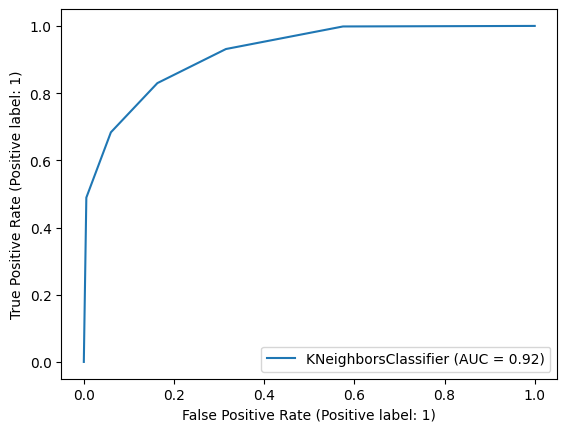

In [30]:
#using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print(roc_auc_score(y, y_pred))
plot_roc_curve(knn, X, y)